In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Load the required modules
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, validation_curve, cross_val_score, GridSearchCV
from matplotlib import pyplot as plt
from timeit import default_timer as timer

from tensorflow import keras
from tensorflow.python.framework.ops import disable_eager_execution
from tensorflow.keras.backend import clear_session

disable_eager_execution()

/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, cop

# Loading and Preparing the data

In [2]:
fully_constructed_ocm_to_places = pd.read_csv('api_data/fully_constructed_ocm_to_places.csv').drop('Unnamed: 0', axis=1)


In [6]:
pd.read_csv('utilization_rates_data/combined_final.csv')

,Unnamed: 0,Unnamed: 0_x,connection_type,power_kwh,power_kwh_num,address,latitude,longitude,available_denominator,day_of_week_num,...,school,gym,local_government_office,entertainment,transit_station,place_of_worship,doctor,point_of_interest,establishment,Unnamed: 0_y
0,0,0,CCS,29.8 kW,29.8,1103 Embarcadero,37.788209,-122.253026,1,3.685879,...,0,1,0,0,5,0,0,2,0,16
1,1,1,CCS,50 kW,50.0,1025 Gilman St,37.880724,-122.297818,2,4.721320,...,12,7,2,0,30,0,2,2,0,9
2,2,2,CCS,50 kW,50.0,1198 El Camino Real,37.555906,-122.318554,2,3.689970,...,11,4,0,0,4,0,5,2,0,66
3,3,3,CCS,50 kW,50.0,1227 Linda Mar Shopping Center,37.595175,-122.504069,2,4.523810,...,0,2,0,0,2,0,2,2,0,118
4,4,4,CCS,50 kW,50.0,230 Bay Pl,37.812769,-122.260998,4,4.725021,...,17,6,3,0,26,0,41,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,97,129,J1772,7.7 kW,7.7,5001 Junipero Serra Blvd,37.673841,-122.464239,2,3.965517,...,0,0,0,0,4,0,0,1,0,73
97,98,130,J1772,7.7 kW,7.7,523 Mulberry St,37.756594,-122.251475,2,3.574468,...,2,1,3,0,21,0,22,0,0,53
98,99,131,J1772,7.7 kW,7.7,5616 Bay St,37.834797,-122.291914,2,3.000000,...,0,0,2,0,11,0,1,1,0,21
99,100,132,J1772,7.7 kW,7.7,5795 Christie Ave,37.837864,-122.295603,2,4.798799,...,4,5,3,0,12,0,31,0,0,11


In [4]:
combined_y.head()

,Unnamed: 0,Unnamed: 0_x,connection_type,power_kwh,power_kwh_num,address,latitude,longitude,available_denominator,day_of_week_num,...,school,gym,local_government_office,entertainment,transit_station,place_of_worship,doctor,point_of_interest,establishment,Unnamed: 0_y
0,0,0,CCS,29.8 kW,29.8,1103 Embarcadero,37.788209,-122.253026,1,3.685879,...,0,1,0,0,5,0,0,2,0,16
1,1,1,CCS,50 kW,50.0,1025 Gilman St,37.880724,-122.297818,2,4.721320,...,12,7,2,0,30,0,2,2,0,9
2,2,2,CCS,50 kW,50.0,1198 El Camino Real,37.555906,-122.318554,2,3.689970,...,11,4,0,0,4,0,5,2,0,66
3,3,3,CCS,50 kW,50.0,1227 Linda Mar Shopping Center,37.595175,-122.504069,2,4.523810,...,0,2,0,0,2,0,2,2,0,118
4,4,4,CCS,50 kW,50.0,230 Bay Pl,37.812769,-122.260998,4,4.725021,...,17,6,3,0,26,0,41,2,0,0


In [177]:
fully_constructed_ocm_to_places[['ID','name','types_0', 'types_1','types_2', 'types_3',
       'types_4', 'types_5', 'types_6', 'types_9', 'types_10']]

,ID,name,types_0,types_1,types_2,types_3,types_4,types_5,types_6,types_9,types_10
0,140980,Cirta Electric,electrician,point_of_interest,establishment,NaN,NaN,NaN,NaN,NaN,NaN
1,140980,Bonheur French Center,point_of_interest,establishment,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,140980,M B Apartments,real_estate_agency,point_of_interest,establishment,NaN,NaN,NaN,NaN,NaN,NaN
3,140980,Sunday Streets,point_of_interest,establishment,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,140980,CSpace Hostings,point_of_interest,establishment,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11995,75840,A1 San Francisco Commercial Refrigeration Repair,point_of_interest,establishment,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11996,75840,Chaat Corner,grocery_or_supermarket,meal_takeaway,restaurant,food,point_of_interest,store,establishment,NaN,NaN
11997,75840,pacifica strategic advisors,point_of_interest,establishment,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11998,75840,quantscape,point_of_interest,establishment,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
g = fully_constructed_ocm_to_places[['ID','types_0', 'types_1','types_2', 'types_3',
       'types_4', 'types_5', 'types_6', 'types_9', 'types_10']].groupby(['ID', 'types_0']).size()
new_df = g.to_frame(name = 'size').reset_index()
dsired_x = new_df.pivot(index='ID',columns='types_0',values='size').fillna(0)

In [4]:
dsired_x.shape#[dsired_x.index==140980]['health']

(200, 97)

In [5]:
conn_cols = ['AddressInfo_Latitude', 'AddressInfo_Longitude', 'ID','Connections_0_ID',
'Connections_0_ConnectionTypeID',
'Connections_0_LevelID',
'Connections_0_Amps',
'Connections_0_Voltage',
'Connections_0_PowerKW',
'Connections_0_CurrentTypeID',
'Connections_0_Quantity',
'StatusTypeID',
'DateLastStatusUpdate',
'DataQualityLevel',
'DateCreated',
'SubmissionStatusTypeID',
'Connections_0_Reference',
'Connections_1_ID',
'Connections_1_ConnectionTypeID',
'Connections_1_Reference',
'Connections_1_LevelID',
'Connections_1_Quantity',
'NumberOfPoints',
'OperatorsReference',
'Connections_0_StatusTypeID',
'GeneralComments',
'UsageCost',
'Connections_1_StatusTypeID',
'Connections_1_PowerKW',
'Connections_1_CurrentTypeID',
'Connections_1_Amps',
'Connections_1_Voltage',
'Connections_2_ID',
'Connections_2_ConnectionTypeID',
'Connections_2_LevelID',
'Connections_2_Amps',
'Connections_2_Voltage',
'Connections_2_PowerKW',
'Connections_2_CurrentTypeID',
'Connections_2_Quantity',
'Connections_3_ID',
'Connections_3_ConnectionTypeID',
'Connections_3_LevelID',
'Connections_3_Amps',
'Connections_3_Voltage',
'Connections_3_PowerKW',
'Connections_3_CurrentTypeID',
'Connections_3_Quantity']

data = pd.merge(right=dsired_x, left=fully_constructed_ocm_to_places[conn_cols], left_on='ID', right_on='ID', how='inner').fillna(0).drop_duplicates()

In [6]:
data

,AddressInfo_Latitude,AddressInfo_Longitude,ID,Connections_0_ID,Connections_0_ConnectionTypeID,Connections_0_LevelID,Connections_0_Amps,Connections_0_Voltage,Connections_0_PowerKW,Connections_0_CurrentTypeID,...,storage,store,supermarket,synagogue,tourist_attraction,train_station,transit_station,travel_agency,university,veterinary_care
0,37.872887,-122.271278,140980,196772.0,1.0,2.0,16.0,230.0,3.7,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
60,37.870823,-122.269910,159234,229365.0,1.0,2.0,16.0,230.0,3.7,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
120,37.868856,-122.266685,71402,102218.0,1.0,2.0,16.0,230.0,3.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
180,37.868856,-122.266685,124205,174276.0,1.0,2.0,16.0,230.0,3.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
240,37.863779,-122.267282,140978,196770.0,1.0,2.0,16.0,230.0,3.0,10.0,...,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11700,37.791878,-122.407178,78740,113359.0,30.0,2.0,0.0,0.0,8.0,10.0,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11760,37.806798,-122.419488,4105,3627.0,1.0,2.0,16.0,230.0,3.7,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
11820,37.787389,-122.403387,130818,183148.0,2.0,3.0,0.0,0.0,50.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11880,37.782688,-122.398346,124158,174220.0,1.0,2.0,16.0,230.0,3.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [7]:
data.shape

(200, 145)

In [9]:
X_train_full = data[data.columns[len(conn_cols):]]
y_train_full = data['Connections_0_Voltage']

In [10]:
## Trainv-validation split 
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=0)


In [11]:
# sns.distplot(y_train_full)
X_train.shape, X_test.shape

((150, 97), (50, 97))

In [12]:
dsired_x

types_0,accounting,airport,amusement_park,art_gallery,atm,bakery,bank,bar,beauty_salon,bicycle_store,...,storage,store,supermarket,synagogue,tourist_attraction,train_station,transit_station,travel_agency,university,veterinary_care
ID,,,,,,,,,,,,,,,,,,,,,
2511,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,2.0,...,0.0,2.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0
2524,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2791,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0
3392,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0
3433,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159237,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
159246,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
161225,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


## Models


In [13]:
comp = pd.DataFrame(y_train).rename({'Connections_0_Voltage':'true_voltage'}, axis=1)
comp_test = comp_test = pd.DataFrame(y_test).rename({'Connections_0_Voltage':'true_voltage'}, axis=1)


In [14]:
comp

,true_voltage
4260,0.0
7440,230.0
11040,230.0
5820,230.0
8940,0.0
...,...
4020,230.0
11520,230.0
7020,230.0
2820,230.0


In [15]:
kf = StratifiedKFold(5,shuffle=True,random_state=0)

In [16]:
def plot_cv_curve(hyperparm_grid,train_scores,val_scores):
    '''
    from hw2
    '''
    ax = plt.subplot(111)
    ax.errorbar(hyperparm_grid,np.mean(train_scores,axis=1),yerr=np.std(train_scores,axis=1),label="train")
    ax.errorbar(hyperparm_grid,np.mean(val_scores,axis=1),yerr=np.std(val_scores,axis=1),label="validation")
    ax.set_xlabel('Hyperparameter')
    ax.set_ylabel('Score')
    ax.legend()
    ax.grid()
    return ax

### Linear Regression

In [131]:
reg_lm = LinearRegression()
reg_lm.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [132]:
comp['linear_reg_prediction'] = reg_lm.predict(X_train)
comp_test['linear_reg_prediction'] = reg_lm.predict(X_test)


In [136]:
for t, c in zip(reg_lm.coef_,X_train):
    print(t, " >> ", c)

39776718988553.9  >>  accounting
39776718988813.53  >>  airport
-1.9609375  >>  amusement_park
39776718988492.7  >>  art_gallery
39776718988523.92  >>  atm
39776718988478.54  >>  bakery
39776718988470.92  >>  bank
39776718988471.7  >>  bar
39776718988503.516  >>  beauty_salon
39776718988689.13  >>  bicycle_store
39776718988619.08  >>  book_store
39776718988662.516  >>  bowling_alley
39776718988493.07  >>  bus_station
39776718988497.46  >>  cafe
39776718988506.984  >>  car_dealer
39776718988503.61  >>  car_rental
39776718988545.01  >>  car_repair
39776718988561.31  >>  car_wash
39776718988709.94  >>  casino
39776718988525.67  >>  church
39776718988529.305  >>  city_hall
39776718988565.27  >>  clothing_store
39776718988499.14  >>  convenience_store
39776718988479.11  >>  courthouse
39776718988504.78  >>  dentist
39776718988520.43  >>  department_store
39776718988520.84  >>  doctor
39776718988382.72  >>  drugstore
39776718988528.445  >>  electrician
39776718988493.57  >>  electronics_stor

### Ridge Regression

In [19]:
ridge_model = Ridge(alpha=100, fit_intercept=True)
ridge_model.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [20]:
ridge_train_error = mean_squared_error(y_train, ridge_model.predict(X_train))
print(ridge_train_error)

7023.388986204863


In [21]:
x_train_prime, x_valid, y_train_prime, y_valid = train_test_split(X_train, y_train, test_size=0.10, random_state=0)

In [22]:
## your code here
alphas = 10 ** np.linspace(-3, 4, num=50, endpoint=True)

def model_ridge(x_train, y_train, x_valid, y_valid, alpha):
    ## initialize Ridge model using corresponding alpha and fit intercept
    m = Ridge(alpha=alpha, fit_intercept=True)
    
    ## Fit to the training data
    m.fit(x_train, y_train)
    
    ## predict on the validation data and calculate MSE
    return mean_squared_error(y_valid, m.predict(x_valid)) ## requires sklearn mean_squared_error


alpha_best = alphas[np.argmin([ model_ridge(x_train_prime, y_train_prime, x_valid, y_valid, a) for a in alphas])]
print(alpha_best)

51.794746792312125


In [23]:
optimized_ridge = Ridge(alpha=alpha_best, fit_intercept=True)
optimized_ridge.fit(X_train, y_train)

tuned_ridge_test_error = mean_squared_error(y_test, optimized_ridge.predict(X_test))
print(tuned_ridge_test_error)

12535.692674239799


In [24]:
comp['ridge_reg_prediction'] = optimized_ridge.predict(X_train)
comp_test['ridge_reg_prediction'] = optimized_ridge.predict(X_test)

### Logistic Regression

In [25]:
## Demo: training a default logit model and cross-validate
logit = LogisticRegression(max_iter=5000)
cv_scores = cross_val_score(logit,X_train,y_train,cv=kf)
print ("Cross-Validation Accuracies:", cv_scores)
print ("Overall CV score is:", np.mean(cv_scores))

Cross-Validation Accuracies: [0.61290323 0.58064516 0.7        0.63333333 0.71428571]
Overall CV score is: 0.6482334869431644


/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision.

/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision.

Wall time for training & cross-validation: 8.790588499999998 second


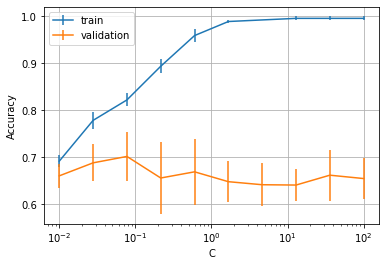

In [26]:
C_grid = np.logspace(-2,2,10)

time_start = timer()

## ran under 20 seconds which is fast
## build a 10x5(mxn) tall grid
m = kf.get_n_splits()
n = len(C_grid)
train_scores = [[0 for garbo_j in range(m)] for garbo_i in range(n)]
val_scores = [[0 for garbo_j in range(m)] for garbo_i in range(n)]

## Split using the KFold to grab the train and validation indices
i=0
for train_index, valid_index in kf.split(X_train, y_train):
    ## Use indices to find training and validation data
    X_train_train, X_train_valid = X_train.iloc[train_index], X_train.iloc[valid_index]
    y_train_train, y_train_valid = y_train.iloc[train_index], y_train.iloc[valid_index]
    
    for j in range(len(C_grid)):
        ## Initialize the Logistic Regression model with appropriate params and fit to training training data
        temp_logit = LogisticRegression(max_iter=5000, C=C_grid[j], solver='newton-cg').fit(X_train_train, y_train_train)
        
        ## Calculate training and validation scores and add scores to building list
        train_scores[j][i] = temp_logit.score(X_train_train, y_train_train)
        val_scores[j][i] = temp_logit.score(X_train_valid, y_train_valid)
#         print("filled i,j", i,j)
    
    i+=1
    
time_end = timer()

print ("Wall time for training & cross-validation: {0} second".format(time_end-time_start))

ax = plot_cv_curve(C_grid,train_scores,val_scores)
ax.set_xlabel('C')
ax.set_ylabel('Accuracy')
ax.set_xscale('log')

In [27]:
print(np.mean(val_scores,axis=1).round(3))
print(np.mean(train_scores,axis=1).round(3))

[0.66  0.688 0.702 0.656 0.669 0.648 0.642 0.641 0.662 0.655]
[0.692 0.778 0.822 0.893 0.958 0.988 0.992 0.995 0.995 0.995]


In [28]:
best_logit = LogisticRegression(max_iter=5000, C=3*10**-1, solver='newton-cg').fit(X_train_train, y_train_train)

In [29]:
comp['logit_reg_prediction'] = best_logit.predict(X_train)
comp_test['logit_reg_prediction'] = best_logit.predict(X_test)

### Linear SVM

/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision.

Wall time for training & cross-validation: 1.5356302599998344 second


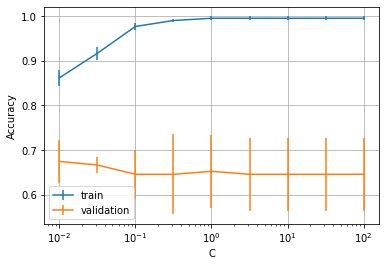

In [121]:
C_grid = np.logspace(-2,2,9)
## Your code here

time_start = timer()

## build a 9x5(mxn) tall grid
m = kf.get_n_splits()
n = len(C_grid)
train_scores = [[0 for garbo_j in range(m)] for garbo_i in range(n)]
val_scores = [[0 for garbo_j in range(m)] for garbo_i in range(n)]

## Split using the KFold to grab the train and validation indices
i=0
for train_index, valid_index in kf.split(X_train, y_train):
    ## Initialize and it a scaler
    scaler = StandardScaler()
    scaler.fit(X_train.iloc[train_index])
    
    ## Use indices to find training and validation data
    X_train_train, X_train_valid = scaler.transform(X_train.iloc[train_index]), scaler.transform(X_train.iloc[valid_index])
    y_train_train, y_train_valid = y_train.iloc[train_index], y_train.iloc[valid_index]
    
    
    
    for j in range(len(C_grid)):
        ## Initialize the Linear SVC model with appropriate params and fit to training training data
        lsvc = LinearSVC(C=C_grid[j], loss='hinge', max_iter=20000).fit(X_train_train, y_train_train)
        
        ## Calculate training and validation scores and add scores to building list
        train_scores[j][i] = lsvc.score(X_train_train, y_train_train)
        val_scores[j][i] = lsvc.score(X_train_valid, y_train_valid)
#         print("filled i,j", i,j)
    
    i+=1

time_end = timer()

print ("Wall time for training & cross-validation: {0} second".format(time_end-time_start))


ax = plot_cv_curve(C_grid,train_scores,val_scores)
ax.set_xlabel('C')
ax.set_ylabel('Accuracy')
ax.set_xscale('log')

### Gaussian (Radial Basis Function) Kernel SVM

In [122]:
## Example: declare a pipeline with only one stage SVC() named 'svc' with rbf kernel
## You can overwrite clf_svm_rbf with your own classifier
# clf_svm_rbf = Pipeline([('svc', SVC(kernel='rbf'))])

## Your code here
clf_svm_rbf = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=1))])
clf_svm_rbf.fit(X_train, y_train)


print ("Final SVM Hyperparameters:")
print (clf_svm_rbf.named_steps['svc'] if clf_svm_rbf.__class__==Pipeline else clf_svm_rbf)
print ("Overall CV score is:", np.mean(cross_val_score(clf_svm_rbf,X_train,y_train,cv=kf)))
print ("Test Accuracy is:", metrics.accuracy_score(y_test,clf_svm_rbf.predict(X_test)))

Final SVM Hyperparameters:
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Overall CV score is: 0.7007066052227342
Test Accuracy is: 0.72


/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision.

In [123]:
comp['svm_rbf_prediction'] = clf_svm_rbf.predict(X_train)
comp_test['svm_rbf_prediction'] = clf_svm_rbf.predict(X_test)

### Polynomial Kernel SVM

In [168]:
## Your code here
C_grid = np.linspace(5,15,51)
best_test = 0
best_train = 0
best_c = -1
for c in C_grid:
    clf_svm_poly = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='poly', C=c, degree=1))])
    clf_svm_poly.fit(X_train, y_train)
    #print(c)
    #print ("Overall CV score is:", np.mean(cross_val_score(clf_svm_poly,X_train,y_train,cv=kf)))
    acc = metrics.accuracy_score(y_test,clf_svm_poly.predict(X_test))
    #print ("Test Accuracy is:", acc)
    if acc > best_test:
        best_test = acc
        best_train = np.mean(cross_val_score(clf_svm_poly,X_train,y_train,cv=kf))
        best_c=c
print('BEST: ',best_c, " >> ", best_test)

/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision.

/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision.

BEST:  8.4  >>  0.78


In [30]:
## Your code here
clf_svm_poly = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='poly', C=10, degree=1))])
clf_svm_poly.fit(X_train, y_train)

print ("Final SVM Hyperparameters:")
print (clf_svm_poly.named_steps['svc'] if clf_svm_poly.__class__==Pipeline else clf_svm_poly)
print ("Overall CV score is:", np.mean(cross_val_score(clf_svm_poly,X_train,y_train,cv=kf)))
print ("Test Accuracy is:", metrics.accuracy_score(y_test,clf_svm_poly.predict(X_test)))

Final SVM Hyperparameters:
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Overall CV score is: 0.6601843317972349
Test Accuracy is: 0.78


/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision.

In [31]:
comp['clf_svm_poly_prediction'] = clf_svm_poly.predict(X_train)
comp_test['clf_svm_poly_prediction'] = clf_svm_poly.predict(X_test)


In [142]:
for t, c in zip(X_train, clf_svm_poly.named_steps['svc'].coef_):
    print(c, " >> ", t)

AttributeError: 'SVC' object has no attribute 'estimator_'

### Decision Tree

In [246]:
## Demo: training a default decision tree model and cross-validate
dt_model = DecisionTreeClassifier(random_state=0)
dt_cv_scores = cross_val_score(dt_model,X_train,y_train,cv=kf)
print ("Cross-Validation Accuracies:", dt_cv_scores)
print ("Overall CV score is:", np.mean(dt_cv_scores))

Cross-Validation Accuracies: [0.58064516 0.58064516 0.63333333 0.7        0.67857143]
Overall CV score is: 0.6346390168970814


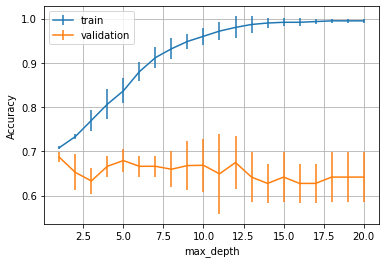

In [247]:
max_dep = range(1,21)

time_start = timer()

## build a 9x5(mxn) tall grid
m = kf.get_n_splits()
n = len(max_dep)
train_scores = [[0 for garbo_j in range(m)] for garbo_i in range(n)]
val_scores = [[0 for garbo_j in range(m)] for garbo_i in range(n)]

## Split using the KFold to grab the train and validation indices
i=0
for train_index, valid_index in kf.split(X_train, y_train):
    ## Initialize and it a scaler
    scaler = StandardScaler()
    scaler.fit(X_train.iloc[train_index])
    
    ## Use indices to find training and validation data
    X_train_train, X_train_valid = scaler.transform(X_train.iloc[train_index]), scaler.transform(X_train.iloc[valid_index])
    y_train_train, y_train_valid = y_train.iloc[train_index], y_train.iloc[valid_index]
    
    
    
    for j in range(len(max_dep)):
        ## Initialize the DecisionTreeClassifier SVC model with appropriate params and fit to training training data
        lsvc = DecisionTreeClassifier(random_state=0, max_depth=max_dep[j]).fit(X_train_train, y_train_train)
        
        ## Calculate training and validation scores and add scores to building list
        train_scores[j][i] = lsvc.score(X_train_train, y_train_train)
        val_scores[j][i] = lsvc.score(X_train_valid, y_train_valid)
#         print("filled i,j", i,j)
    
    i+=1

time_end = timer()

ax = plot_cv_curve(max_dep,train_scores,val_scores)
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
plt.show()

In [32]:
clf_dt = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeClassifier(random_state=0, max_depth=11, max_leaf_nodes=4))])
clf_dt.fit(X_train, y_train)

print ("Final Decision Tree Hyperparameters:")
print (clf_dt.named_steps['dt'] if clf_dt.__class__==Pipeline else clf_dt)
print ("Overall CV score is:", np.mean(cross_val_score(clf_dt,X_train,y_train,cv=kf)))
print ("Test Accuracy is:", metrics.accuracy_score(y_test,clf_dt.predict(X_test)))

Final Decision Tree Hyperparameters:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')
Overall CV score is: 0.6323963133640553
Test Accuracy is: 0.66


/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to 

In [33]:
comp['clf_dt_prediction'] = clf_dt.predict(X_train)
comp_test['clf_dt_prediction'] = clf_dt.predict(X_test)


### Ensemble Method: Random Forest

In [255]:
## Demo: training a default random forest model and cross-validate
rf_model = RandomForestClassifier(random_state=0)
rf_cv_scores = cross_val_score(rf_model,X_train,y_train,cv=kf)
print ("Cross-Validation Accuracies:", rf_cv_scores)
print ("Overall CV score is:", np.mean(rf_cv_scores))

Cross-Validation Accuracies: [0.58064516 0.74193548 0.66666667 0.7        0.60714286]
Overall CV score is: 0.6592780337941628


In [261]:
## Brute eforce determining optimal C between 1-1000  
currnet_max_acc = 0
current_max_d = 1
current_max_m = 1
current_max_test_acc = 0
for d in range(2,10):
    for m in range(2,100, 10):
        clf_rf = Pipeline([('scaler', StandardScaler()), ('dt', RandomForestClassifier(random_state=0, 
                                                                                       max_depth=d, 
                                                                                       min_samples_leaf=1,
                                                                                       max_leaf_nodes=m))])
        clf_rf.fit(X_train, y_train)

        overall_cv_score = np.mean(cross_val_score(clf_rf,X_train,y_train,cv=kf))
        #print (clf_rf.named_steps['dt'] if clf_rf.__class__==Pipeline else clf_rf)
        #print ("Overall CV score is:", overall_cv_score)
        #print ("Test Accuracy is:", metrics.accuracy_score(y_test,clf_rf.predict(X_test)))

        if overall_cv_score > currnet_max_acc:
            currnet_max_acc = overall_cv_score
            current_max_d = d
            current_max_m = m
            current_max_test_acc = metrics.accuracy_score(y_test,clf_rf.predict(X_test))
        elif overall_cv_score == currnet_max_acc:
            new_test_acc = metrics.accuracy_score(y_test,clf_rf.predict(X_test))
            if new_test_acc > current_max_test_acc:
                currnet_max_acc = overall_cv_score
                current_max_d = d
                current_max_m = m
                current_max_test_acc = new_test_acc

print("optimal max leaf nodes is: ", current_max_m )
print("optimal max depth is: ", current_max_d )
print('overall CV score is: ', currnet_max_acc)
print('Test Accuracy score is: ', current_max_test_acc)
    

optimal max leaf nodes is:  42
optimal max depth is:  8
overall CV score is:  0.7269892473118279
Test Accuracy score is:  0.74


In [36]:
## Example: declare a pipeline with only one stage RandomForestClassifier() named 'rf'
## You can overwrite clf_rf with your own classifier
# clf_rf = Pipeline([('rf',RandomForestClassifier())])
## Your code here
clf_rf = Pipeline([('scaler', StandardScaler()), ('rf',  RandomForestClassifier(random_state=0,
                                                                                max_depth= 8,#current_max_d,
                                                                                min_samples_leaf=1,
                                                                                max_leaf_nodes=42#current_max_m
                                                                               ))])
clf_rf.fit(X_train, y_train)

print ("Final Random Forest Hyperparameters:")
print (clf_rf.named_steps['rf'] if clf_rf.__class__==Pipeline else clf_rf)
print ("Overall CV score is:", np.mean(cross_val_score(clf_rf,X_train,y_train,cv=kf)))
print ("Test Accuracy is:", metrics.accuracy_score(y_test,clf_rf.predict(X_test)))

/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:487: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wi

Final Random Forest Hyperparameters:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=42,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
Overall CV score is: 0.7269892473118279
Test Accuracy is: 0.74


In [38]:
comp['clf_rf_prediction'] = clf_rf.predict(X_train)
comp_test['clf_rf_prediction'] = clf_rf.predict(X_test)


/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

### AdaBoost

In [259]:
## Demo: training a default AdaBoost model and cross-validate
adaboost_model = AdaBoostClassifier(random_state=0)
rf_cv_scores = cross_val_score(adaboost_model,X_train,y_train,cv=kf)
print ("Cross-Validation Accuracies:", rf_cv_scores)
print ("Overall CV score is:", np.mean(rf_cv_scores))

Cross-Validation Accuracies: [0.67741935 0.67741935 0.6        0.7        0.67857143]
Overall CV score is: 0.6666820276497696


In [265]:
## Brute eforce determining optimal C between 1-1000  
currnet_max_acc = 0
current_n = 0
current_lr = .1
current_max_test_acc = 0
# base = RandomForestClassifier(random_state=0, n_estimators=1000)
# for d in range(2,10):

for lr in np.linspace(.1, 1, 10):
    for n in np.linspace(50, 250, 10):
        clf_ab = Pipeline([('scaler', StandardScaler()), ('dt', AdaBoostClassifier(random_state=0,
    #                                                                                base_estimator=base, 
                                                                                   n_estimators=int(n),
                                                                                   learning_rate=lr
                                                                              ))])
        clf_ab.fit(X_train, y_train)

        overall_cv_score = np.mean(cross_val_score(clf_ab,X_train,y_train,cv=kf))
        #print (clf_ab.named_steps['dt'] if clf_ab.__class__==Pipeline else clf_dt)
        #print ("Overall CV score is:", overall_cv_score)
        #print ("Test Accuracy is:", metrics.accuracy_score(y_test,clf_ab.predict(X_test)))

        if overall_cv_score > currnet_max_acc:
            currnet_max_acc = overall_cv_score
            current_n = n
            current_max_test_acc = metrics.accuracy_score(y_test,clf_ab.predict(X_test))
        elif overall_cv_score == currnet_max_acc:
            ## break ties with tset accuracy
            new_test_acc = metrics.accuracy_score(y_test,clf_ab.predict(X_test))
            if new_test_acc > current_max_test_acc:
                currnet_max_acc = overall_cv_score
                current_n = n
                current_lr = lr
                current_max_test_acc = new_test_acc

# print("optimal max leaf nodes is: ", current_max_d )
print("optimal learning rate is: ", current_lr )
print("optimal n esetimators is: ", current_n )
print('overall CV score is: ', currnet_max_acc)
print('Test Accuracy score is: ', current_max_test_acc)
    

optimal learning rate is:  0.1
optimal n esetimators is:  50.0
overall CV score is:  0.7007066052227342
Test Accuracy score is:  0.64


In [39]:
clf_ab = Pipeline([('scaler', StandardScaler()), ('ab', AdaBoostClassifier(random_state=0, learning_rate=.1, n_estimators=50))])
clf_ab.fit(X_train, y_train)

print ("Final AdaBoost Hyperparameters:")
print (clf_ab.named_steps['ab'] if clf_ab.__class__==Pipeline else clf_ab)
print ("Overall CV score is:", np.mean(cross_val_score(clf_ab,X_train,y_train,cv=kf)))
print ("Test Accuracy is:", metrics.accuracy_score(y_test,clf_ab.predict(X_test)))

/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

Final AdaBoost Hyperparameters:
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=50, random_state=0)


/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

Overall CV score is: 0.7007066052227342
Test Accuracy is: 0.64


In [40]:
comp['clf_ab_prediction'] = clf_ab.predict(X_train)
comp_test['clf_ab_prediction'] = clf_ab.predict(X_test)


### Neural Net

In [99]:
def build_vanillaNN(optimizer):
  model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100,activation="sigmoid",kernel_initializer=initializer_G),
    keras.layers.Dense(10,activation="softmax",kernel_initializer=initializer_G)
  ])
  model.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy"])
  return model

def train_nn(model,epochs=5,verbose=0,validation=True):
  if validation:
    history = model.fit(X_train,y_train,validation_data=(X_val,y_val),
                        batch_size=32,epochs=epochs,shuffle=False,verbose=verbose)
  else:
    history = model.fit(X_train,y_train,
                        batch_size=32,epochs=epochs,shuffle=False,verbose=verbose)
  return history

def plot_learning(history,label,c,ax_loss,ax_acc):
  train_label = "train ({0})".format(label)
  val_label   = "validation ({0})".format(label)
  if 'loss' in history.history:
    ax_loss.plot(history.history['loss'],c=c,label=train_label)
  if 'val_loss' in history.history:
    ax_loss.plot(history.history['val_loss'],'--',c=c,label=val_label)
  if 'accuracy' in history.history:
    ax_acc.plot(history.history['acc'],c=c,label=train_label)
  if 'val_accuracy' in history.history:
    ax_acc.plot(history.history['val_acc'],'--',c=c,label=val_label)

  for ax in [ax_loss,ax_acc]:
    ax.legend()
    ax.grid('on')
    ax.set_xlabel("epoch")
  ax_loss.set_ylabel("Loss")
  ax_acc.set_ylabel("Accuracy")

In [107]:
clear_session()

def nn_model():
    # model_final=cnn_model()
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=[97]),
        keras.layers.Dense(units=4, activation="relu", kernel_initializer='he_uniform', ),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(rate=.05, seed=0)
        ])
#     ## add variable # of hiddden layers
    model.add(keras.layers.Dense(units=198, activation="relu", kernel_initializer='he_uniform'))
    model.add(keras.layers.BatchNormalization())
#     model.add(keras.layers.Dropout(rate=.25, seed=0))

#     for i in [250, 200, 200]:
#         model.add(keras.layers.Dense(units=i, activation="relu", kernel_initializer='he_uniform'))
#         model.add(keras.layers.BatchNormalization())
#         model.add(keras.layers.Dropout(rate=.25, seed=0))
#         model.add(keras.layers.Dropout(rate=.2, seed=0))
#         model.add(keras.layers.Dropout(rate=.1, seed=0))

    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(units=4,activation="softmax",kernel_initializer='he_uniform'))

    # compile with default RMSprop optimizer
    model.compile(loss="sparse_categorical_crossentropy",
                      optimizer=keras.optimizers.RMSprop(),
                      metrics=["accuracy"])
    return model

model_final=nn_model()

Train on 160 samples, validate on 40 samples
Epoch 1/5
160/160 [==============================] - 0s 3ms/sample - loss: 1.8807 - acc: 0.2000 - val_loss: 2.9776 - val_acc: 0.6000
Epoch 2/5
160/160 [==============================] - 0s 85us/sample - loss: 1.5073 - acc: 0.2625 - val_loss: 2.2813 - val_acc: 0.6000
Epoch 3/5
160/160 [==============================] - 0s 80us/sample - loss: 1.3598 - acc: 0.3250 - val_loss: 1.9738 - val_acc: 0.6000
Epoch 4/5
160/160 [==============================] - 0s 78us/sample - loss: 1.2651 - acc: 0.4437 - val_loss: 1.5526 - val_acc: 0.6000
Epoch 5/5
160/160 [==============================] - 0s 94us/sample - loss: 1.1927 - acc: 0.5562 - val_loss: 1.3658 - val_acc: 0.6000
Elapsed training time: 957.882715493s


W0330 15:34:56.493890 4730846720 legend.py:1193] No handles with labels found to put in legend.


validation accuracy: 0.6


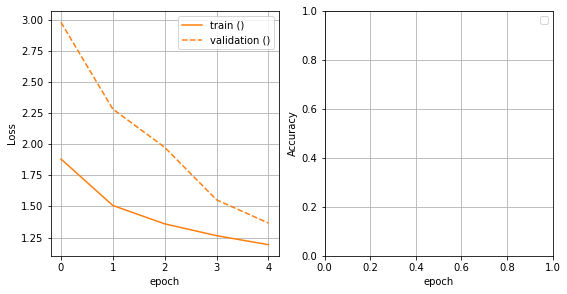

In [108]:
from timeit import default_timer

# assert (model_final.history is None),('Do not pass a model that has been trained before')
output_mappy = {
    0: 0,
    120: 1,
    230: 2,
    400: 3
}
nn_y_train_full = y_train_full.replace(output_mappy)
history = model_final.fit(X_train_full,nn_y_train_full,validation_split=0.2,
                          epochs=5,batch_size=32,shuffle=False,verbose=1)
end_time = default_timer()
print ('Elapsed training time: {0}s'.format(end_time-start_time))
fig, AX = plt.subplots(nrows=1,ncols=2,figsize=(9,4.5))
plot_learning(history,'{0}'.format(''), 'C1',AX[0],AX[1])
print ('validation accuracy:', history.history['val_acc'][-1])

### Model Comparison

In [126]:
comp

,true_voltage,linear_reg_prediction,ridge_reg_prediction,logit_reg_prediction,clf_svm_poly_prediction,clf_dt_prediction,clf_rf_prediction,clf_ab_prediction,svm_rbf_prediction
4260,0.0,-0.5,102.076880,0.0,0.0,0.0,0.0,230.0,0.0
7440,230.0,231.5,233.861534,230.0,230.0,230.0,230.0,230.0,230.0
11040,230.0,206.5,190.421914,230.0,230.0,230.0,230.0,230.0,230.0
5820,230.0,186.5,229.832499,230.0,230.0,230.0,230.0,230.0,230.0
8940,0.0,73.5,149.793006,230.0,0.0,230.0,0.0,230.0,230.0
...,...,...,...,...,...,...,...,...,...
4020,230.0,124.5,183.995383,230.0,230.0,230.0,230.0,230.0,230.0
11520,230.0,217.5,213.980349,230.0,230.0,230.0,230.0,230.0,230.0
7020,230.0,205.5,222.663054,230.0,230.0,230.0,230.0,230.0,230.0
2820,230.0,211.5,185.306271,230.0,230.0,230.0,230.0,230.0,230.0


In [127]:
comp['true_voltage'].unique()

array([  0., 230., 400., 120.])

In [129]:
for c in X_train.columns:
    print(c)

accounting
airport
amusement_park
art_gallery
atm
bakery
bank
bar
beauty_salon
bicycle_store
book_store
bowling_alley
bus_station
cafe
car_dealer
car_rental
car_repair
car_wash
casino
church
city_hall
clothing_store
convenience_store
courthouse
dentist
department_store
doctor
drugstore
electrician
electronics_store
embassy
finance
fire_station
florist
food
funeral_home
furniture_store
gas_station
general_contractor
grocery_or_supermarket
gym
hair_care
hardware_store
health
home_goods_store
hospital
insurance_agency
jewelry_store
laundry
lawyer
library
light_rail_station
liquor_store
local_government_office
locksmith
lodging
meal_delivery
meal_takeaway
mosque
movie_rental
movie_theater
moving_company
museum
natural_feature
night_club
painter
park
parking
pet_store
pharmacy
physiotherapist
place_of_worship
plumber
point_of_interest
police
post_office
premise
primary_school
real_estate_agency
restaurant
roofing_contractor
school
secondary_school
shoe_store
shopping_mall
spa
stadium
storag

In [150]:
comp_test

,true_voltage,linear_reg_prediction,ridge_reg_prediction,logit_reg_prediction,clf_svm_poly_prediction
4954,230.0,290.0,287.773743,230.0,230.0
11999,230.0,210.0,212.369949,230.0,230.0
11041,230.0,196.0,199.609237,230.0,230.0
7532,230.0,218.0,220.306475,230.0,230.0
11966,230.0,210.0,212.369949,230.0,230.0
...,...,...,...,...,...
6972,0.0,109.0,110.267969,0.0,0.0
8869,0.0,62.0,61.192409,0.0,0.0
8866,0.0,62.0,61.192409,0.0,0.0
4677,400.0,318.0,312.106807,400.0,400.0


In [119]:
def display_accuracies(comp_df, comp_test_df, cols):
    for c in cols:
        
        train_wrong = comp_df[comp_df['true_voltage']!=comp_df[c]]
        train_correct =  comp_df[comp_df['true_voltage']==comp_df[c]]

        test_wrong = comp_test_df[comp_test_df['true_voltage']!=comp_test_df[c]]
        test_correct =  comp_test_df[comp_test_df['true_voltage']==comp_test_df[c]]
        print('\n', c)
        print('  > Train Accuracy: ',  1-(len(train_wrong)/len(train_correct)))
        print('  > Test Accuracy : ',  1-(len(test_wrong)/len(test_correct)))

In [124]:
comp_test.columns

Index(['true_voltage', 'linear_reg_prediction', 'ridge_reg_prediction',
       'logit_reg_prediction', 'clf_svm_poly_prediction', 'clf_dt_prediction',
       'clf_rf_prediction', 'clf_ab_prediction', 'svm_rbf_prediction'],
      dtype='object')

In [125]:
comparable_cols = ['logit_reg_prediction', 'clf_svm_poly_prediction', 'clf_dt_prediction',
       'clf_rf_prediction', 'clf_ab_prediction', 'svm_rbf_prediction']
display_accuracies(comp, comp_test, comparable_cols)


 logit_reg_prediction
  > Train Accuracy:  0.8721804511278195
  > Test Accuracy :  0.48484848484848486

 clf_svm_poly_prediction
  > Train Accuracy:  0.9726027397260274
  > Test Accuracy :  0.717948717948718

 clf_dt_prediction
  > Train Accuracy:  0.6111111111111112
  > Test Accuracy :  0.48484848484848486

 clf_rf_prediction
  > Train Accuracy:  0.8970588235294118
  > Test Accuracy :  0.6486486486486487

 clf_ab_prediction
  > Train Accuracy:  0.5576923076923077
  > Test Accuracy :  0.4375

 svm_rbf_prediction
  > Train Accuracy:  0.8095238095238095
  > Test Accuracy :  0.6111111111111112


In [145]:
x_y = X_train.copy()
x_y['actual_voltage'] = y_train.copy()
x_y

,accounting,airport,amusement_park,art_gallery,atm,bakery,bank,bar,beauty_salon,bicycle_store,...,store,supermarket,synagogue,tourist_attraction,train_station,transit_station,travel_agency,university,veterinary_care,actual_voltage
4260,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0
7440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,230.0
11040,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230.0
5820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,230.0
8940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230.0
11520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,13.0,0.0,230.0
7020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230.0
2820,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230.0


In [148]:
x_y.corr('pearson')['actual_voltage']

accounting        -0.017372
airport            0.234754
amusement_park          NaN
art_gallery       -0.082904
atm               -0.076282
                     ...   
transit_station    0.149050
travel_agency      0.085055
university         0.080363
veterinary_care   -0.082828
actual_voltage     1.000000
Name: actual_voltage, Length: 98, dtype: float64

In [149]:
def corr_vis(df, features, meas='actual_voltage'):
    ## Create a blank dataframe that calculates all the correlations to TOG
    vis = pd.DataFrame()
    vis['feature'] = features
    vis['spearman'] = [df[f].corr(df[meas], 'spearman') for f in features]
    #[print(str(features[f]) + ": " + str(spr['spearman'][f])) for f in range(len(features))]
    
    vis = vis.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    ax = sns.barplot(data=vis, y='feature', x='spearman', orient='h')
    
    ## Chart design
    ax.set(xlabel='correlation')
    ax.set(title='Correlation of all features to {meas}'.format(meas=meas)) 
    return vis

,feature,spearman
0,accounting,NaN
1,airport,NaN
2,amusement_park,NaN
3,art_gallery,NaN
4,atm,NaN
...,...,...
92,train_station,NaN
93,transit_station,NaN
94,travel_agency,NaN
95,university,NaN


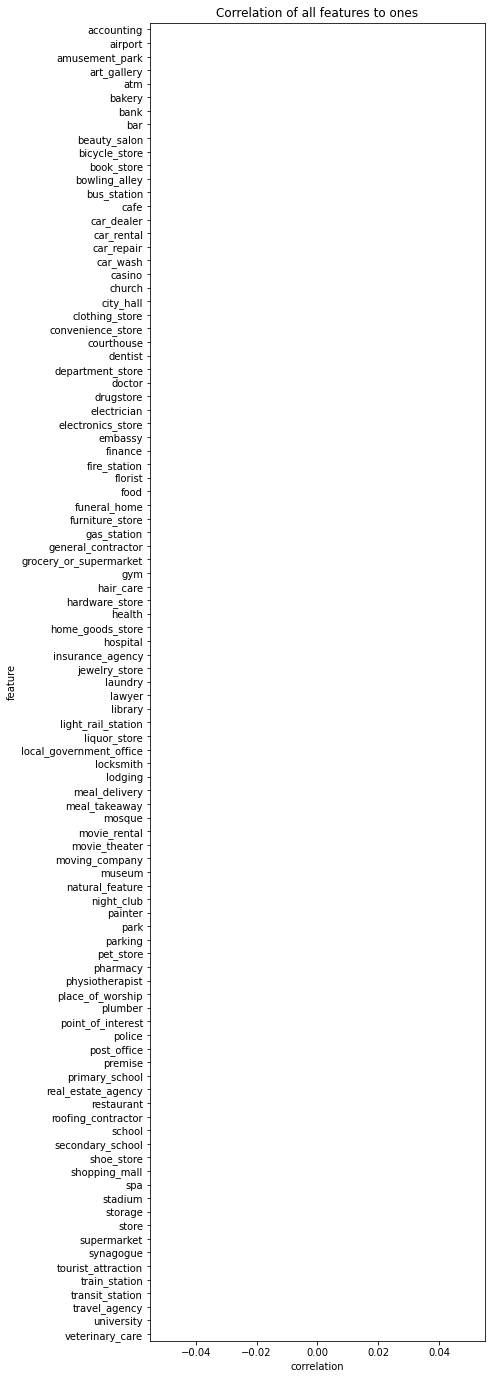

In [157]:
corr_vis(x_y, data.columns[len(conn_cols):], meas='ones')

In [163]:
x_y['ones'] = np.repeat(1, len(x_y))
x_y

,accounting,airport,amusement_park,art_gallery,atm,bakery,bank,bar,beauty_salon,bicycle_store,...,supermarket,synagogue,tourist_attraction,train_station,transit_station,travel_agency,university,veterinary_care,actual_voltage,ones
4260,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,1
7440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,230.0,1
11040,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230.0,1
5820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,230.0,1
8940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230.0,1
11520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,13.0,0.0,230.0,1
7020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230.0,1
2820,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230.0,1


In [164]:
x_y.corr('spearman')

,accounting,airport,amusement_park,art_gallery,atm,bakery,bank,bar,beauty_salon,bicycle_store,...,supermarket,synagogue,tourist_attraction,train_station,transit_station,travel_agency,university,veterinary_care,actual_voltage,ones
accounting,1.000000,-0.072635,NaN,-0.006720,-0.114472,-0.114229,-0.033091,0.000866,0.044604,-0.072633,...,0.000000,-0.072635,-0.076532,-0.072635,-0.158552,-0.018165,-0.062578,-0.116028,-0.046234,NaN
airport,-0.072635,1.000000,NaN,-0.050557,-0.092093,-0.063902,-0.049298,0.160688,-0.069333,-0.013513,...,0.489760,-0.013514,-0.034248,-0.013514,0.079483,0.246694,-0.054198,-0.021587,0.225608,NaN
amusement_park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
art_gallery,-0.006720,-0.050557,NaN,1.000000,-0.157500,0.232981,-0.184436,0.106608,-0.029637,0.098008,...,-0.011291,-0.050557,0.066449,0.099008,0.000990,-0.134899,0.209333,0.244973,-0.109472,NaN
atm,-0.114472,-0.092093,NaN,-0.157500,1.000000,0.322106,0.272471,0.295687,0.218533,0.056237,...,-0.137111,0.107442,-0.044267,0.007674,0.061170,-0.040273,-0.043812,-0.019615,-0.059119,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
travel_agency,-0.018165,0.246694,NaN,-0.134899,-0.040273,-0.066238,0.106857,0.078009,-0.117592,0.125555,...,0.122751,-0.051826,0.128686,-0.051826,-0.054192,1.000000,0.085446,-0.082788,0.094065,NaN
university,-0.062578,-0.054198,NaN,0.209333,-0.043812,0.007156,-0.147498,0.078399,-0.212225,-0.054197,...,0.032789,-0.054198,0.261068,-0.054198,0.175215,0.085446,1.000000,0.092989,0.002990,NaN
veterinary_care,-0.116028,-0.021587,NaN,0.244973,-0.019615,0.173824,0.031500,0.203743,0.310108,-0.021586,...,-0.044076,-0.021587,-0.054708,-0.021587,0.133096,-0.082788,0.092989,1.000000,-0.072078,NaN
actual_voltage,-0.046234,0.225608,NaN,-0.109472,-0.059119,-0.207618,-0.141193,-0.081408,-0.041313,-0.068785,...,0.071058,0.052802,-0.101445,-0.069603,0.091226,0.094065,0.002990,-0.072078,1.000000,NaN


In [171]:
fully_constructed_ocm_to_places[fully_constructed_ocm_to_places.columns[:20]]

,AddressInfo_Latitude,AddressInfo_Longitude,ID,IsRecentlyVerified,UUID,DataProviderID,DataProvidersReference,OperatorID,UsageTypeID,AddressInfo_ID,AddressInfo_Title,AddressInfo_AddressLine1,AddressInfo_Town,AddressInfo_StateOrProvince,AddressInfo_Postcode,AddressInfo_CountryID,AddressInfo_ContactTelephone1,AddressInfo_AccessComments,AddressInfo_RelatedURL,AddressInfo_Distance
0,37.872887,-122.271278,140980,False,F6DC9364-8693-4EDF-9F90-0C685869D239,2,125128.0,59.0,1.0,141332,Greenlots - 112229U,1945 Berkeley Way,Berkeley,CA,BERKE,2,855-900-7584,24 hours daily,http://greenlots.com/,0.119884
1,37.872887,-122.271278,140980,False,F6DC9364-8693-4EDF-9F90-0C685869D239,2,125128.0,59.0,1.0,141332,Greenlots - 112229U,1945 Berkeley Way,Berkeley,CA,BERKE,2,855-900-7584,24 hours daily,http://greenlots.com/,0.119884
2,37.872887,-122.271278,140980,False,F6DC9364-8693-4EDF-9F90-0C685869D239,2,125128.0,59.0,1.0,141332,Greenlots - 112229U,1945 Berkeley Way,Berkeley,CA,BERKE,2,855-900-7584,24 hours daily,http://greenlots.com/,0.119884
3,37.872887,-122.271278,140980,False,F6DC9364-8693-4EDF-9F90-0C685869D239,2,125128.0,59.0,1.0,141332,Greenlots - 112229U,1945 Berkeley Way,Berkeley,CA,BERKE,2,855-900-7584,24 hours daily,http://greenlots.com/,0.119884
4,37.872887,-122.271278,140980,False,F6DC9364-8693-4EDF-9F90-0C685869D239,2,125128.0,59.0,1.0,141332,Greenlots - 112229U,1945 Berkeley Way,Berkeley,CA,BERKE,2,855-900-7584,24 hours daily,http://greenlots.com/,0.119884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,37.782688,-122.398346,75840,False,7CB39E62-1F96-405B-BDB2-3DF9184969CD,2,80180.0,5.0,1.0,76186,360 3RD ST,360 3rd St,San Francisco,CA,94107,2,888-758-4389,24 hours daily,http://www.chargepoint.com/,9.204926
11996,37.782688,-122.398346,75840,False,7CB39E62-1F96-405B-BDB2-3DF9184969CD,2,80180.0,5.0,1.0,76186,360 3RD ST,360 3rd St,San Francisco,CA,94107,2,888-758-4389,24 hours daily,http://www.chargepoint.com/,9.204926
11997,37.782688,-122.398346,75840,False,7CB39E62-1F96-405B-BDB2-3DF9184969CD,2,80180.0,5.0,1.0,76186,360 3RD ST,360 3rd St,San Francisco,CA,94107,2,888-758-4389,24 hours daily,http://www.chargepoint.com/,9.204926
11998,37.782688,-122.398346,75840,False,7CB39E62-1F96-405B-BDB2-3DF9184969CD,2,80180.0,5.0,1.0,76186,360 3RD ST,360 3rd St,San Francisco,CA,94107,2,888-758-4389,24 hours daily,http://www.chargepoint.com/,9.204926
